# 計量時系列分析のレポート課題 2019/06/16
参考文献：沖本本
https://www.amazon.co.jp/%E7%B5%8C%E6%B8%88%E3%83%BB%E3%83%95%E3%82%A1%E3%82%A4%E3%83%8A%E3%83%B3%E3%82%B9%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E8%A8%88%E9%87%8F%E6%99%82%E7%B3%BB%E5%88%97%E5%88%86%E6%9E%90-%E7%B5%B1%E8%A8%88%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%83%BC-%E6%B2%96%E6%9C%AC-%E7%AB%9C%E7%BE%A9/dp/4254127928

# ライブラリのインポート

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import DataReader
from datetime import datetime
%matplotlib inline
from scipy.stats import norm
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.api import stattools, AR, ARMA, VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.simplefilter('ignore')

# 第1章

## 1.3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC875B4160>,
      dtype=object)

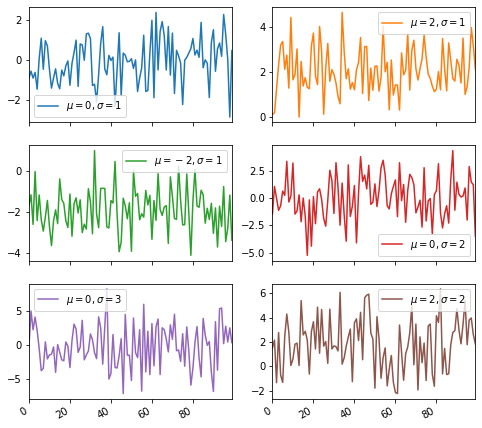

In [2]:
# Set up the mu values and sigma values
mu_sigma = [(0, 1), (2, 1), (-2, 1), (0, 2), (0, 3), (2, 2)]

# Generate white_noise
white_noise = pd.DataFrame()

# Loop processing and plot it
for mu, sigma in mu_sigma:
    name = '$\mu={0}, \sigma={1}$'.format(mu, sigma)
    white_noise[name] = np.random.normal(mu, sigma, 100)
white_noise.plot(subplots=True, layout=(3,2), figsize=(8, 8))

## 1.5

In [3]:
import numpy as np
import datetime
from scipy.stats import norm
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [4]:
# NIKKEi 225
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
nikkei225 = web.DataReader("NIKKEI225", "fred", start, end) 
nikkei225 = nikkei225.dropna(how='all', axis=[0, 1])
nikkei225 = nikkei225.resample('M').mean() 

In [5]:
# Japan / U.S. Foreign Exchange Rate
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
JPUS = web.DataReader("EXJPUS", "fred", start, end)
JPUS = JPUS.dropna(how='all', axis=[0, 1])
JPUS = JPUS.resample('M').mean()

In [6]:
# Production of Total Industry in Japan
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
PTI = web.DataReader("JPNPROINDMISMEI", "fred", start, end)
PTI = PTI.dropna(how='all', axis=[0, 1])
PTI = PTI.resample('M').mean()

In [7]:
# Consumer Price Index of All Items in Japan
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
CPI = web.DataReader("JPNCPIALLMINMEI", "fred", start, end)
CPI = CPI.dropna(how='all', axis=[0, 1])
CPI = CPI.resample('M').mean() 

In [8]:
 # Unemployed Population: Aged 15-64: All Persons for Japan
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
UnempPop = web.DataReader("LFUN64TTJPM647N", "fred", start, end)
UnempPop = UnempPop.dropna(how='all', axis=[0, 1])
UnempPop = UnempPop.resample('M').mean() 

In [9]:
# 1-Week London Interbank Offered Rate (LIBOR), based on Japanese Yen
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2018, 12, 31)
LIBOR = web.DataReader("JPY1WKD156N", "fred", start, end)
LIBOR = LIBOR.dropna(how='all', axis=[0, 1])
LIBOR = LIBOR.resample('M').mean() 

In [10]:
All = pd.concat([nikkei225, JPUS, PTI, CPI, UnempPop, LIBOR], axis=1)
All.columns = [u'Nikkei 225', u'JPYUSD FX Rate', u'PTI', u'CPI', u'Unemployment Populations', u'LIBOR']

In [11]:
All.isnull().sum()

Nikkei 225                  0
JPYUSD FX Rate              0
PTI                         0
CPI                         0
Unemployment Populations    0
LIBOR                       0
dtype: int64

nikkei225
JPUS
PTI
CPI
UnempPop
LIBOR

### (1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC883ED7F0>,
      dtype=object)

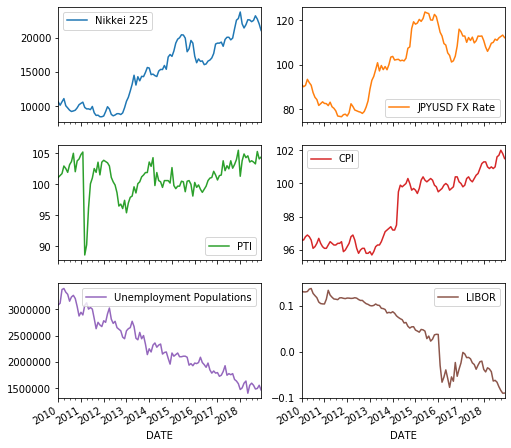

In [12]:
All.plot(subplots=True, layout=(3,2), figsize=(8, 8))

### (2)

In [13]:
All_Ln = np.log(All).diff() * 100

### (3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC88581A20>,
      dtype=object)

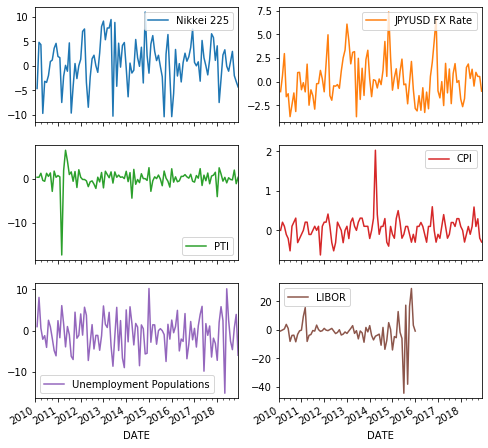

In [14]:
All_Ln.plot(subplots=True, layout=(3,2), figsize=(8, 8))

### (4)(5)

In [15]:
# 自己相関を求める
def portmanteau_test(endog, lags=10):
    q_m, pvalues = acorr_ljungbox(endog, lags=lags)
    df = pd.DataFrame([q_m.round(2), pvalues.round(3)], index=['Q(m)', 'p値'], columns=range(1, lags + 1))
    return df

In [16]:
nikkei225_Ln = All_Ln["Nikkei 225"].dropna()
print(portmanteau_test(nikkei225_Ln))

         1      2      3      4      5      6      7      8      9      10
Q(m)  2.080  2.080  2.280  2.830  4.040  4.510  5.650  6.900  6.950  7.630
p値    0.149  0.353  0.516  0.587  0.543  0.609  0.582  0.547  0.643  0.665


In [17]:
JPUS_Ln = All_Ln["JPYUSD FX Rate"].dropna()
print(portmanteau_test(JPUS_Ln))

          1     2       3       4       5       6       7       8       9   \
Q(m)  10.420  15.9  16.650  16.690  16.710  17.460  17.520  17.870  18.080   
p値     0.001   0.0   0.001   0.002   0.005   0.008   0.014   0.022   0.034   

          10  
Q(m)  18.490  
p値     0.047  


In [18]:
PTI_Ln = All_Ln["PTI"].dropna()
print(portmanteau_test(PTI_Ln))

         1     2      3      4      5      6      7      8       9       10
Q(m)  2.040  3.93  6.560  6.570  6.830  6.840  8.040  9.000  10.610  11.120
p値    0.153  0.14  0.087  0.161  0.234  0.336  0.329  0.342   0.303   0.348


In [19]:
CPI_Ln = All_Ln["CPI"].dropna()
print(portmanteau_test(CPI_Ln))

         1       2       3       4       5       6       7       8       9   \
Q(m)  8.400  10.470  15.410  16.280  16.980  17.070  17.220  17.930  18.950   
p値    0.004   0.005   0.001   0.003   0.005   0.009   0.016   0.022   0.026   

          10  
Q(m)  20.680  
p値     0.023  


In [20]:
UnempPop_Ln = All_Ln["Unemployment Populations"].dropna()
print(portmanteau_test(UnempPop_Ln))

         1      2      3      4       5       6      7       8       9   \
Q(m)  3.710  8.750  9.160  9.180  10.770  11.050  11.21  14.620  14.830   
p値    0.054  0.013  0.027  0.057   0.056   0.087   0.13   0.067   0.096   

          10  
Q(m)  15.270  
p値     0.122  


In [21]:
LIBOR_Ln = All_Ln["LIBOR"].dropna()
print(portmanteau_test(LIBOR_Ln))

         1      2      3      4      5      6      7      8      9     10
Q(m)  2.240  3.010  4.630  6.070  7.270  8.800  8.810  8.860  8.920  8.92
p値    0.134  0.222  0.201  0.194  0.201  0.185  0.266  0.355  0.445  0.54


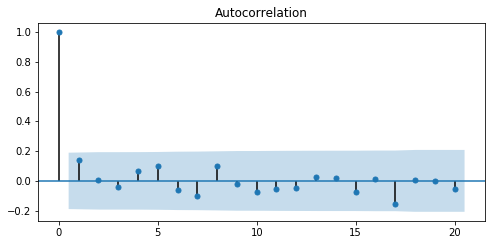

In [22]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nikkei225_Ln, lags=20, ax=ax1)

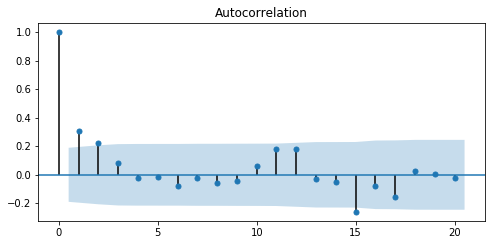

In [23]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(JPUS_Ln, lags=20, ax=ax1)

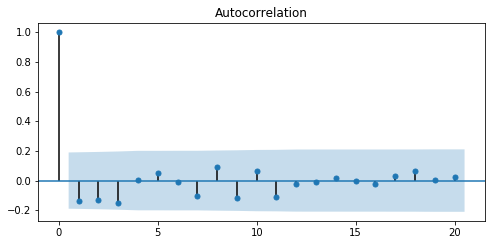

In [24]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(PTI_Ln, lags=20, ax=ax1)

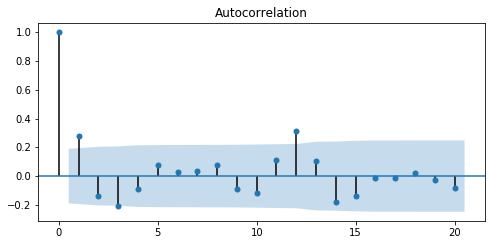

In [25]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CPI_Ln, lags=20, ax=ax1)

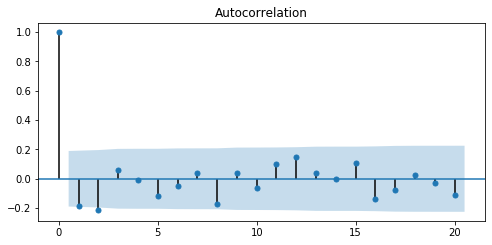

In [26]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(UnempPop_Ln, lags=20, ax=ax1)

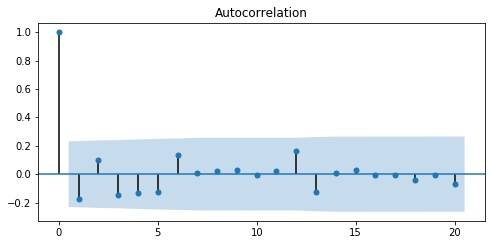

In [27]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(LIBOR_Ln, lags=20, ax=ax1)

## 2.5

### (1)

In [28]:
def arma_comparison(endog, models):
    df = pd.DataFrame(index=['AIC', 'SIC'])
    for model in models:
        mod = ARMA(endog, model).fit()
        df[str(model)] = [round(mod.aic, 1), round(mod.bic, 1)]
    df['min'] = df.idxmin(axis=1)
    return df

models = [(4,0), (0,3), (1,1), (2,1), (1,2), (2,2)]
arma_comparison(JPUS_Ln, models)

,"(4, 0)","(0, 3)","(1, 1)","(2, 1)","(1, 2)","(2, 2)",min
AIC,471.8,470.0,469.1,470.5,470.2,472.0,"(1, 1)"
SIC,487.9,483.3,479.8,483.8,483.5,488.0,"(1, 1)"


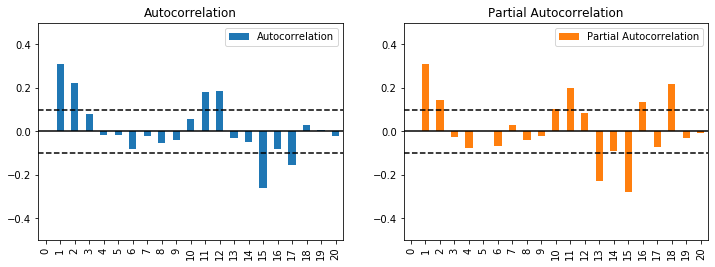

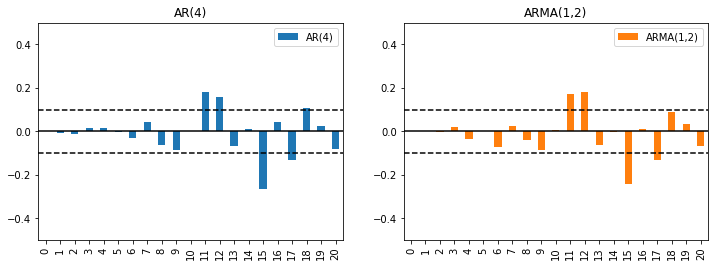

In [29]:
ac = stattools.acf(JPUS_Ln, nlags=20)
ac[0] = np.nan

pac = stattools.pacf(JPUS_Ln, nlags=20)
pac[0] = np.nan

def plot_lines(axs):
    if isinstance(axs, np.ndarray):
        for ax in axs:
            plot_lines(ax)
    else:
        axs.axhline(0, color='k')
        axs.axhline(0.1, ls='--', color='k')
        axs.axhline(-0.1, ls='--', color='k')
        
df = pd.DataFrame({'Autocorrelation': ac, 'Partial Autocorrelation': pac})
axs = df.plot.bar(subplots=True, layout=(1,2), figsize=(12,4), ylim=(-0.5,0.5))
plot_lines(axs)


AR4 = AR(JPUS_Ln).fit(maxlag=4)
AR4_ac = stattools.acf(AR4.resid, nlags=20)
AR4_ac[0] = np.nan

ARMA12 = ARMA(JPUS_Ln, (1,2)).fit()

ARMA12_ac = stattools.acf(ARMA12.resid, nlags=20)
ARMA12_ac[0] = np.nan

df = pd.DataFrame({'AR(4)': AR4_ac, 'ARMA(1,2)': ARMA12_ac})
axs = df.plot.bar(subplots=True, layout=(1,2), figsize=(12,4), ylim=(-0.5,0.5))
plot_lines(axs)

### (2)

In [30]:
portmanteau_test(AR4.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.010,0.030,0.050,0.080,0.08,0.18,0.4,0.850,1.720,1.720
p値,0.928,0.986,0.997,0.999,1.00,1.00,1.0,0.999,0.995,0.998


In [31]:
portmanteau_test(ARMA12.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.000,0.000,0.040,0.200,0.200,0.800,0.870,1.060,1.910,1.910
p値,0.971,0.999,0.998,0.995,0.999,0.992,0.997,0.998,0.993,0.997


## 2.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC8976ABE0>,
      dtype=object)

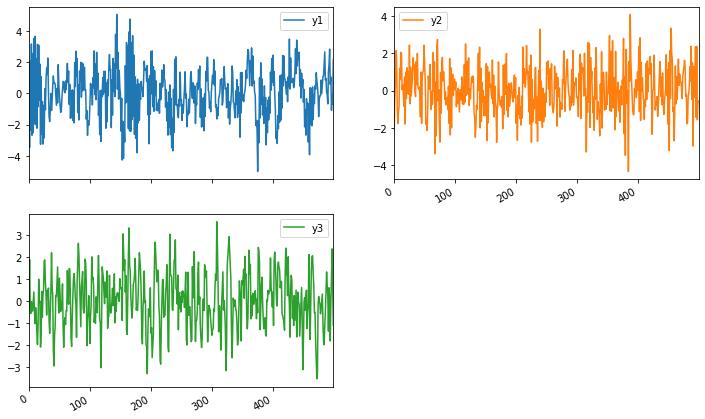

In [32]:
# Read the Data
arma = pd.read_csv("arma.csv")
arma.plot(subplots=True, layout=(3,2), figsize=(12,12))

### (1)

In [57]:
def compare_arma_models(endog, orders):
    df = pd.DataFrame(index=['AIC', 'SIC'])
    for order in orders:
        mod = ARMA(endog, order).fit()
        df[str(order)] = [round(mod.aic, 1), round(mod.bic, 1)]
    df['min'] = df.idxmin(axis=1)
    return df

In [42]:
y1 = arma.y1.values

In [43]:
def plot_acf_pacf(x, lags=20):
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    plot_acf(x, ax=ax1, lags=lags)
    ax2 = fig.add_subplot(122)
    plot_pacf(x, ax=ax2, lags=lags)

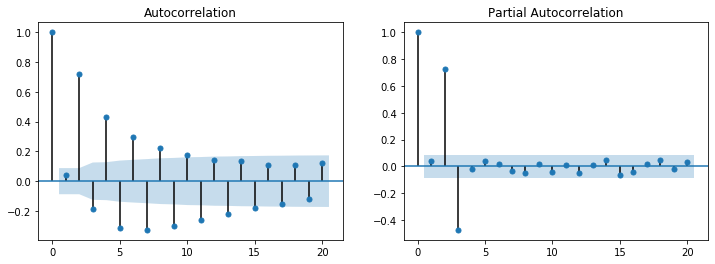

In [44]:
_ = plot_acf_pacf(y1)


### (3)

In [45]:
order_select = stattools.arma_order_select_ic(y1, max_ar=4, max_ma=4,  ic=['aic', 'bic'])
print(order_select['aic'])
print(order_select['bic'])

print('AIC:', order_select['aic_min_order'], ', SIC:', order_select['bic_min_order'])

             0            1            2            3            4
0  1891.123086  1892.810671  1573.285482  1574.237531  1489.750361
1  1892.357132  1765.615477  1539.954417  1445.949558  1398.439820
2  1521.771658  1425.920774  1402.142668  1392.488089  1391.281614
3  1387.355213  1389.298771  1390.526573  1391.402067  1391.703279
4  1389.290040  1391.094378  1393.093293  1393.402065  1394.336204
             0            1            2            3            4
0  1899.552302  1905.454496  1590.143914  1595.310572  1515.038010
1  1905.000957  1782.473909  1561.027457  1471.237206  1427.942076
2  1538.630091  1446.993814  1427.430317  1421.990346  1424.998479
3  1408.428254  1414.586420  1420.028829  1425.118932  1429.634752
4  1414.577689  1420.596635  1426.810157  1431.333538  1436.482285
AIC: (3, 0) , SIC: (3, 0)


### (4)

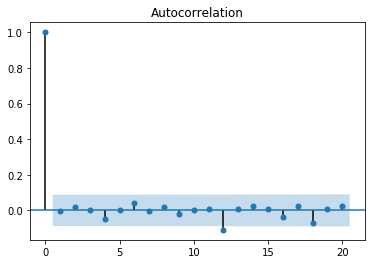

In [46]:
AR3 = AR(y1).fit(maxlag=3)
_ = plot_acf(AR3.resid, lags=20)

In [47]:
portmanteau_test(AR3.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.000,0.200,0.200,1.510,1.510,2.290,2.310,2.490,2.700,2.700
p値,0.962,0.903,0.977,0.825,0.912,0.891,0.941,0.962,0.975,0.988


### (5)

#### y_2

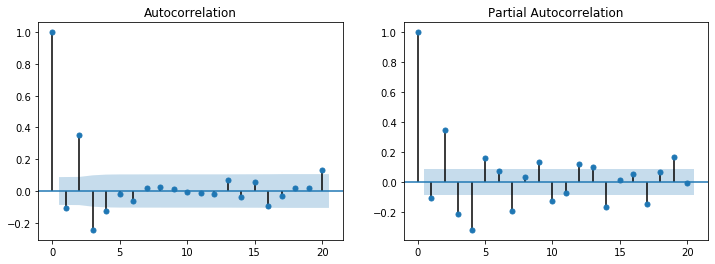

In [48]:
y2 = arma.y2.values
plot_acf_pacf(y2)

In [58]:
orders = [(0,2), (2,1), (2,2), (3,1), (3,2)]
compare_arma_models(y2, orders)

,"(0, 2)","(2, 1)","(2, 2)","(3, 1)","(3, 2)",min
AIC,1525.7,1601.0,1436.6,1568.0,1438.5,"(2, 2)"
SIC,1542.6,1622.1,1461.9,1593.3,1468.0,"(2, 2)"


In [50]:
order_select = stattools.arma_order_select_ic(y2, max_ar=4, max_ma=4,  ic=['aic', 'bic'])
print(order_select['aic'])
print(order_select['bic'])

print('AIC:', order_select['aic_min_order'], ', SIC:', order_select['bic_min_order'])

             0            1            2            3            4
0  1671.315835  1669.790393  1525.728152  1432.928525  1434.199794
1  1667.433901  1642.924718  1461.647396  1434.175615  1435.098041
2  1606.506709  1601.045714  1436.644883  1435.968342  1437.032600
3  1586.025889  1567.967217  1438.495032  1433.850672  1433.984779
4  1533.489205  1528.367172  1437.008469  1432.689262  1428.606088
             0            1            2            3            4
0  1679.745051  1682.434218  1542.586585  1454.001566  1459.487442
1  1680.077726  1659.783150  1482.720436  1459.463264  1464.600298
2  1623.365141  1622.118754  1461.932531  1465.470599  1470.749464
3  1607.098929  1593.254866  1467.997289  1467.567537  1471.916252
4  1558.776853  1557.869429  1470.725334  1470.620735  1470.752169
AIC: (4, 4) , SIC: (0, 3)


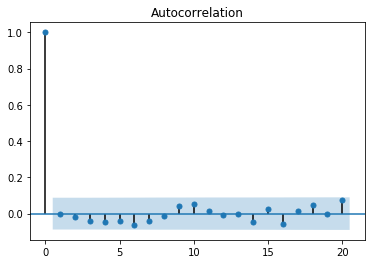

In [51]:
arma44 = ARMA(y2, (4,4)).fit()
_ = plot_acf(arma44.resid, lags=20)

In [52]:
portmanteau_test(arma44.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.000,0.210,1.13,2.100,2.960,5.000,5.900,6.010,6.820,8.250
p値,0.952,0.901,0.77,0.718,0.706,0.543,0.551,0.647,0.656,0.605


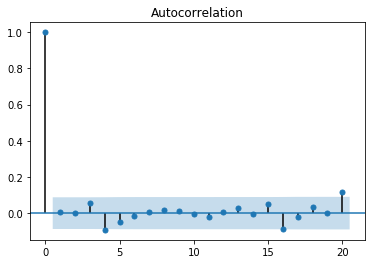

In [53]:
arma03 = ARMA(y2, (0,4)).fit()
_ = plot_acf(arma03.resid, lags=20)

In [54]:
portmanteau_test(arma03.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.010,0.010,1.640,5.99,7.130,7.290,7.310,7.420,7.500,7.530
p値,0.935,0.995,0.651,0.20,0.211,0.295,0.398,0.492,0.585,0.675


#### y_3

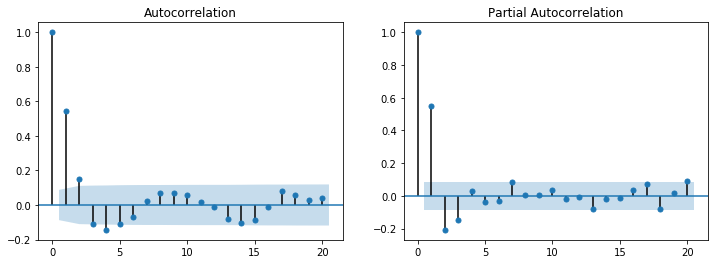

In [55]:
y3 = arma.y3.values
plot_acf_pacf(y3)

In [59]:
orders = [(4,0), (8,0), (1,1), (1,2), (1,3), (2,1), (2,2), (2,3)]
compare_arma_models(y3, orders)

,"(4, 0)","(8, 0)","(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 2)","(2, 3)",min
AIC,1432.2,1435.8,1448.2,1434.6,1433.7,1434.0,1434.1,1433.2,"(4, 0)"
SIC,1457.5,1478.0,1465.1,1455.7,1459.0,1455.1,1459.3,1462.7,"(2, 1)"


In [60]:
order_select = stattools.arma_order_select_ic(y3, max_ar=4, max_ma=4,  ic=['aic', 'bic'])
print(order_select['aic'])
print(order_select['bic'])

print('AIC:', order_select['aic_min_order'], ', SIC:', order_select['bic_min_order'])

             0            1            2            3            4
0  1635.136850  1476.563525  1432.604231  1434.604069  1433.206364
1  1460.086056  1448.226012  1434.604127  1433.694992  1433.451979
2  1439.530700  1433.998277  1434.060557  1433.189042  1435.227642
3  1430.773490  1432.055389  1434.047120  1435.017327  1436.917706
4  1432.209162  1434.052964  1428.475520  1433.399489  1433.702228
             0            1            2            3            4
0  1643.566066  1489.207349  1449.462664  1455.677110  1458.494012
1  1472.729881  1465.084444  1455.677167  1458.982640  1462.954236
2  1456.389132  1455.071317  1459.348206  1462.691299  1468.944507
3  1451.846531  1457.343037  1463.549376  1468.734192  1474.849179
4  1457.496811  1463.555220  1462.192385  1471.330962  1475.848309
AIC: (4, 2) , SIC: (0, 2)


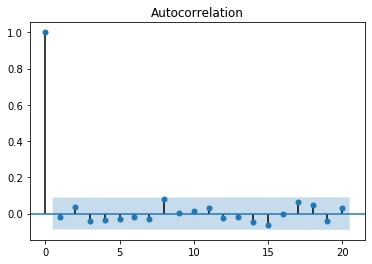

In [61]:
arma42 = ARMA(y3, (4,2)).fit()
_ = plot_acf(arma42.resid, lags=20)

In [62]:
portmanteau_test(arma42.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.200,0.870,1.730,2.340,2.840,3.000,3.380,6.60,6.610,6.720
p値,0.651,0.646,0.631,0.673,0.724,0.809,0.847,0.58,0.678,0.752


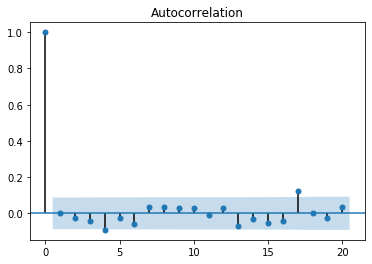

In [63]:
arma02 = ARMA(y3, (0,2)).fit()
_ = plot_acf(arma02.resid, lags=20)

In [64]:
portmanteau_test(arma02.resid)

,1,2,3,4,5,6,7,8,9,10
Q(m),0.000,0.30,1.160,5.240,5.540,7.370,7.970,8.640,9.070,9.56
p値,0.999,0.86,0.763,0.263,0.354,0.288,0.336,0.373,0.431,0.48
